# ネットワークの読み込み，描画，処理

ネットワークの読み込み，描画，基本的な処理を行います。

networkxの読み込み

In [1]:
import networkx as nx

その他ライブラリ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## ネットワークの読み込みと描画
エッジリスト形式のネットワークデータを読み込む

大腸菌の代謝ネットワークの一部（解糖系・糖新生とTCA回路）を例にします。

* ``../data/eco_EM+TCA.txt``
* [KEGGデータベース](https://www.kegg.jp)
* Kanehisa M, Sato Y, Furumichi M, Morishima K, Tanabe M (2019) New approach for understanding genome variations in KEGG. Nucleic Acids Res., 47, pp. D590–D595. [https://doi.org/10.1093/nar/gky962](https://doi.org/10.1093/nar/gky962])

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/kztakemoto/network-analysis-in-biology/refs/heads/main/data/eco_EM%2BTCA.txt", sep='\s+', header=None)

グラフオブジェクトに変換

In [4]:
# グラフオブジェクトの作成
g = nx.from_pandas_edgelist(df,
                           source=df.columns[0],  # 最初の列をsourceとして使用
                           target=df.columns[1],  # 2番目の列をtargetとして使用
                           create_using=nx.DiGraph())  # 有向グラフとして作成

# 多重エッジと自己ループの削除（必須でない）
g = nx.DiGraph(g)  # 多重エッジを自動的に削除
g.remove_edges_from(nx.selfloop_edges(g))  # 自己ループを削除

隣接行列

In [5]:
nx.adjacency_matrix(g).toarray() # numpy array 形式で取得(デフォルトでは疎行列（sparse matrix）形式で返すため)

array([[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 

## ネットワークの描画

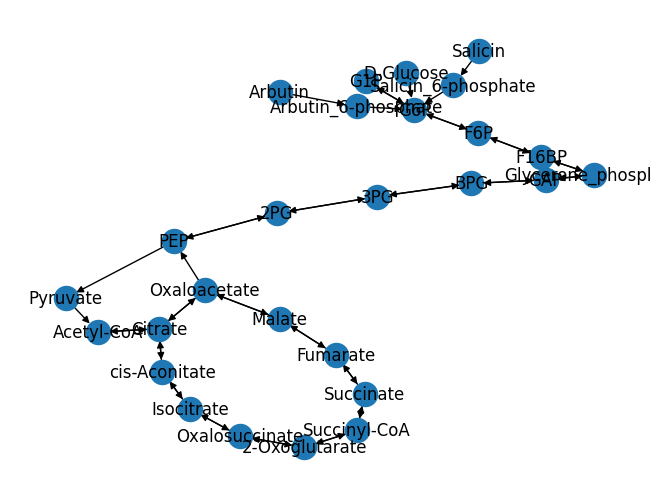

In [6]:
# グラフの描画
pos = nx.spring_layout(g, seed=40)
nx.draw(g, pos=pos, with_labels=True, arrows=True)

## もう少し凝ったネットワーク描画
オプションをいろいろ与えることができます。

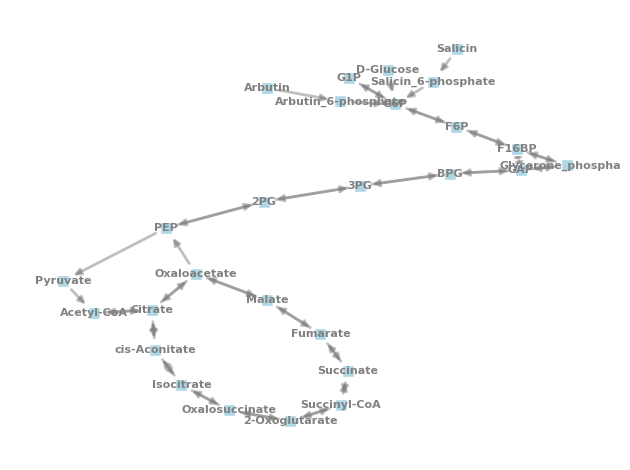

In [7]:
# ノードの描画
nx.draw_networkx_nodes(g,
                      pos=pos,
                      node_size=80,
                      node_color='lightblue',
                      node_shape='s',  # square
                      edgecolors='white')

# エッジの描画
nx.draw_networkx_edges(g,
                      pos=pos,
                      edge_color='gray',
                      width=2,
                      alpha=0.5,  # 透明度
                      arrowsize=10)

# ラベルの描画
nx.draw_networkx_labels(g,
                       pos=pos,
                       font_size=8,
                       font_color='gray',
                       font_weight='bold')

# プロットの調整
plt.axis('off')
plt.tight_layout()
plt.show()

## ネットワークの処理
### 無向ネットワークに変換する

グラフオブジェクトを更新していることに注意

In [8]:
g = nx.Graph(g)
# g.to_undirected()でも無向に変換できるが、A->B, A<-Bのような双方向エッジは多重エッジ（A=B）に変換される。
# nx.Graph()を使うとこのようなエッジは結合される（つまりA-Bに変換される）。

### ノードを削除する
例として，F6PとGAPを削除する。

In [9]:
g.remove_nodes_from(["F6P", "GAP"])

### エッジを削除する
例として，2PG–3PGと3PG–BPGのエッジを削除する。

In [10]:
g.remove_edges_from([("2PG", "3PG"), ("3PG", "BPG")])

この時点で描画

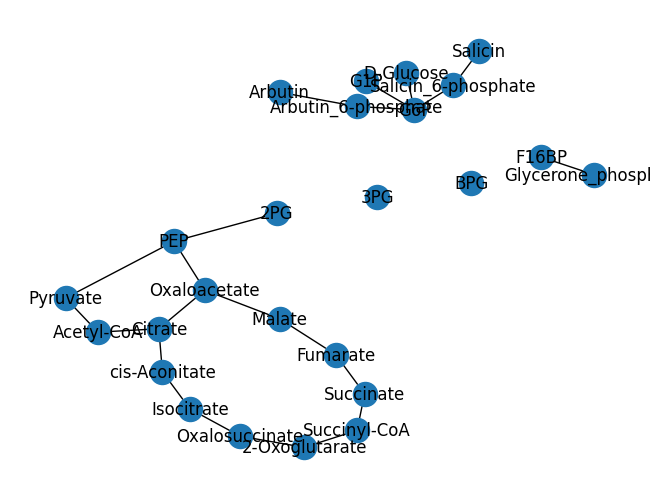

In [11]:
# グラフの描画
nx.draw(g, pos=pos, with_labels=True, arrows=True)

### 連結成分（正確には弱連結成分）を見つける

In [12]:
list(nx.connected_components(g))
# list(nx.weakly_connected_components(g))  # 有向グラフの場合

[{'2-Oxoglutarate',
  '2PG',
  'Acetyl-CoA',
  'Citrate',
  'Fumarate',
  'Isocitrate',
  'Malate',
  'Oxaloacetate',
  'Oxalosuccinate',
  'PEP',
  'Pyruvate',
  'Succinate',
  'Succinyl-CoA',
  'cis-Aconitate'},
 {'3PG'},
 {'BPG'},
 {'Arbutin',
  'Arbutin_6-phosphate',
  'D-Glucose',
  'G1P',
  'G6P',
  'Salicin',
  'Salicin_6-phosphate'},
 {'F16BP', 'Glycerone_phosphate'}]

連結成分で色分けして描画

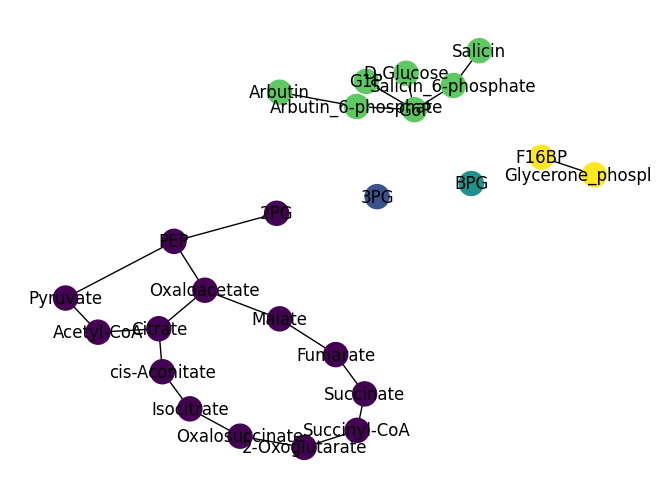

In [13]:
# 連結成分の情報をもとに、簡易的な色付け
node_colors = [next(i for i, comp in enumerate(nx.connected_components(g)) if node in comp) for node in g.nodes]

# 描画
nx.draw(g, pos=pos, node_color=node_colors, with_labels=True)

最大連結成分を抽出して描画

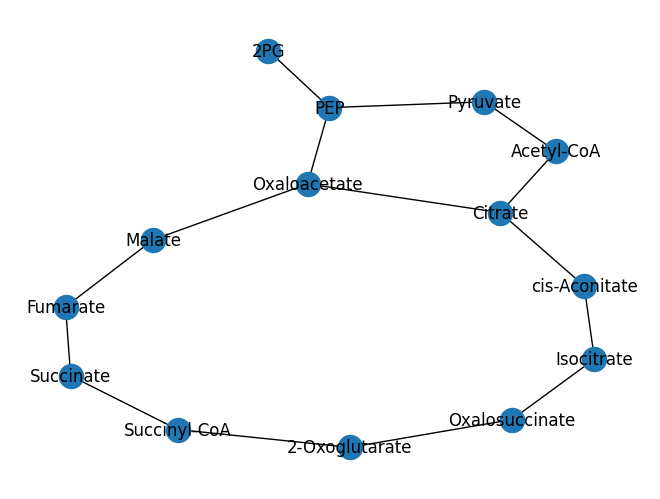

In [14]:
# 最大連結成分のサブグラフを作成
g_lcc = g.subgraph(max(nx.connected_components(g), key=len))

pos = nx.spring_layout(g_lcc, seed=40)
nx.draw(g_lcc, pos=pos, with_labels=True)

## やってみよう
* このNotebookを参考にして，別の生物ネットワークを読み込んで描画・処理してみよう（``data``に様々ある）。
  * ただ，ネットワークが大きすぎると描画に時間がかかるので注意
* Notebookを参考に自分のネットワークデータを読み込んで描画・処理してみよう。